Importing required modules

In [1]:
# import relevant libraries
%matplotlib inline
import json
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import squarify
from functools import reduce
import glob

**Draw a simple pitch**

In [12]:
def draw_pitch(ax, colour = None, edge = 'black'):
    
    Background = Rectangle([-10,-10], width = 135, height = 95, fill = False)
    # Pitch Outline and Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, edgecolor = edge, fill = False)
    
    if colour:
        Background = Rectangle([-10,-10], width = 135, height = 95, color = colour)
        # Pitch Outline and Centre Line
        Pitch = Rectangle([0,0], width = 120, height = 80, edgecolor = edge, facecolor = colour)
    
    # Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,18], width = 18, height = 44, edgecolor = edge, fill = False)
    RightPenalty = Rectangle([102,18], width = 18, height = 44, edgecolor = edge, fill = False)
    midline = ConnectionPatch([60,0], [60,80], 'data', 'data', color = edge)
    
    # Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,30], width = 6, height = 20, edgecolor = edge, fill = False)
    RightSixYard = Rectangle([114,30], width = 6, height = 20, edgecolor = edge, fill = False)
    
    #Goals
    LeftGoal = Rectangle([-3,36], width = 3, height = 8, linewidth = 1, edgecolor = 'black', fill = False)
    RightGoal = Rectangle([120,36], width = 3, height = 8, linewidth = 1, edgecolor = 'black', fill = False)
    
    # Prepare Circles
    centreCircle = plt.Circle((60,40), 8.1, color = edge, fill = False)
    centreSpot = plt.Circle((60,40), 0.71, color = edge)
    
    # Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((12,40), 0.71, color = edge)
    rightPenSpot = plt.Circle((108,40), 0.71, color = edge)
    leftArc = Arc((14, 40), height = 16.2, width = 16.2, angle = 0, theta1 = 300, theta2 = 60, color = edge)
    rightArc = Arc((106, 40), height = 16.2, width = 16.2, angle = 0, theta1 = 120, theta2 = 240, color = edge)
    
    element = [Background, Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc, LeftGoal, RightGoal]
    for i in element:
        ax.add_patch(i)

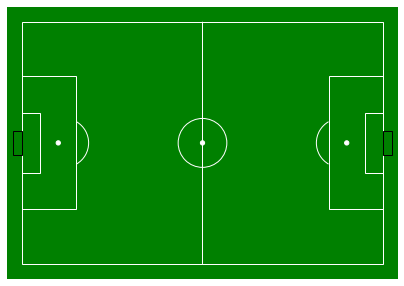

In [13]:
fig = plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1, 1, 1)
draw_pitch(ax, 'green', 'white')
plt.ylim(-5, 85)
plt.xlim(-5, 125)
plt.axis('off')
plt.show()

In [4]:
# consequently read the json and concatenate into a pre-defined dataframe
match_list =[7562, 7549, 7565, 7581, 7557, 7566, 7548, 7534, 7576, 7540, 7568, 7569, 7570, 8655, 8657, 7543, 7558, 7529, 8650, 7546, 7537, 7580, 7545, 7536, 7530, 7535, 7584, 8649, 7538, 7533, 7560, 7525, 7532, 7555, 7571, 8652, 7553, 7559, 7577, 7539, 7550, 7556, 7561, 7586, 7563, 7579, 7578, 8651, 7531, 7552, 8658, 7585, 7554, 7542, 7551, 7564, 7567, 7544, 7541, 7583, 7572, 7547, 7582, 8656]
all_matchInfo = pd.DataFrame()
for i in match_list:
    with open('C:\\Users\\anike\\PycharmProjects\\Soccer-Analytics\\Soccer-Analytics\\open-data\\data\\events\\'+str(i)+'.json', encoding="utf8") as data_file:
        data = json.load(data_file)
    df = json_normalize(data, sep = '_')
    if all_matchInfo.empty:
        all_matchInfo = df
    else:
        all_matchInfo = pd.concat([all_matchInfo, df], join = 'outer', sort = False)


In [8]:
def heat_pass_shot_map(ax, data, player_name, passes = False, shots = False, heatmap = False):
    shot_data = data[(data['type_name'] == 'Shot') & (data['player_name'] == player_name)]
    pass_data = data[(data['type_name'] == 'Pass') & (data['player_name'] == player_name)]
    action_data = data[(data['player_name'] == player_name)][:-1]
    
    ax.title.set_text(player_name)

    if heatmap:
        draw_pitch(ax)
    else:
        draw_pitch(ax, 'green', 'white')
    
    if passes:
        for i in range(len(pass_data)):
            # Differentiate different half by different colour
            color = 'blue' if pass_data.iloc[i]['period'] == 1 else 'red'
            ax.annotate('', xy = (pass_data.iloc[i]['pass_end_location'][0], pass_data.iloc[i]['pass_end_location'][1]), xycoords = 'data',
                xytext = (pass_data.iloc[i]['location'][0], pass_data.iloc[i]['location'][1]), textcoords = 'data',
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color=color))
    
    if shots:
        for i in range(len(shot_data)):
            # Differentiate different half by different colour
            color = 'black' 
            if shot_data.iloc[i]['shot_outcome_name'] == 'Goal':
                color ='yellow' o
            elif shot_data.iloc[i]['shot_outcome_name'] == 'Saved':
                color = 'purple'
            ax.annotate('', xy = (shot_data.iloc[i]['shot_end_location'][0], shot_data.iloc[i]['shot_end_location'][1]), xycoords = 'data',
                xytext = (shot_data.iloc[i]['location'][0], shot_data.iloc[i]['location'][1]), textcoords = 'data',
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color=color))
    
    if heatmap:
        x_coord = [i[0] for i in action_data['location']]
        y_coord = [i[1] for i in action_data['location']]
        sns.kdeplot(x_coord, y_coord, shade = 'True', color = 'green', n_levels = 30, ax=ax)

In [6]:
all_matchInfo = all_matchInfo.dropna(subset=['location'])

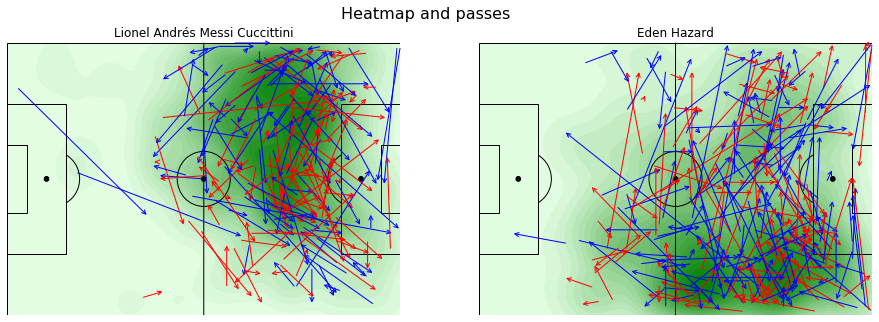

In [49]:
fig = plt.figure(edgecolor='green')
fig.set_size_inches(15.5, 5)
fig.suptitle('Heatmap and passes', fontsize=16)

ax1=fig.add_subplot(1, 2, 1)
ax2=fig.add_subplot(1, 2, 2)


heat_pass_shot_map(ax1, all_matchInfo, 'Lionel Andrés Messi Cuccittini', passes = True, heatmap = True)
heat_pass_shot_map(ax2, all_matchInfo, 'Eden Hazard', passes = True, heatmap = True)


ax1.set(ylim=(0, 80))
ax1.set(xlim=(0, 120))
ax1.axis('off')
ax2.set(ylim=(0, 80))
ax2.set(xlim=(0, 120))
ax2.axis('off')
# plt.show()
plt.savefig('HeatmapWC.png')

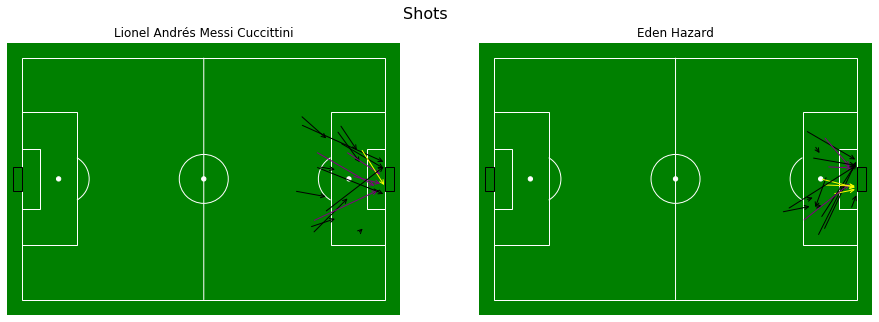

In [50]:
fig = plt.figure(edgecolor='green')
fig.set_size_inches(15.5, 5)
fig.suptitle('Shots', fontsize=16)

ax1=fig.add_subplot(1, 2, 1)
ax2=fig.add_subplot(1, 2, 2)


heat_pass_shot_map(ax1, all_matchInfo, 'Lionel Andrés Messi Cuccittini', passes = False, shots = True)
heat_pass_shot_map(ax2, all_matchInfo, 'Eden Hazard', passes = False, shots = True)


ax1.set(ylim=(-5, 85))
ax1.set(xlim=(-5, 125))
ax1.axis('off')
ax2.set(ylim=(-5, 85))
ax2.set(xlim=(-5, 125))
ax2.axis('off')
# plt.show()
plt.savefig('shotsWC.png')


**Radars**

In [18]:
df = all_matchInfo

In [19]:
def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))
        
        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables)
        [[
            txt.set_fontweight('bold'),
            txt.set_fontsize(12),
            txt.set_position((0,-0.2))
        ] for txt in text]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

In [20]:
def get_player_stats(player_name):

    passes = df[(df['type_name'] == 'Pass') & (df['player_name'] == player_name)]['pass_outcome_name']
    passes_complete = passes.isna().sum()
    passes_incomplete = passes.count()
    pass_percentage = passes_complete / (passes_incomplete + passes_complete)

    shots = df[(df['type_name'] == 'Shot') & (df['player_name'] == player_name)]['shot_outcome_name'].count()

    pressures = df[(df['type_name'] == 'Pressure') & (df['player_name'] == player_name)]['type_name'].count()

    ball_recoveries = df[(df['type_name'] == 'Ball Recovery') & (df['player_name'] == player_name)]['type_name'].count()

    touches = df[((df['type_name'] == 'Shot') | (df['type_name'] == 'Pass')) & (df['player_name'] == player_name)]['location']
    touches_in_box = []
    for touch in touches.values:
        if touch[0] >= 114 and touch[1] >= 30 and touch[1] <= 50:
            touches_in_box.append(touch)
    touches_in_box_count = len(touches_in_box)

    fouls_won = df[(df['type_name'] == 'Foul Won') & (df['player_name'] == player_name)]['type_name'].count()
    stats = {
        'pass_percentage': float(pass_percentage),
        'shots': int(shots),
        'pressures': int(pressures),
        'ball_recoveries': int(ball_recoveries),
        'touches_in_box': int(touches_in_box_count),
        'fouls_won': int(fouls_won)
    }
    return stats


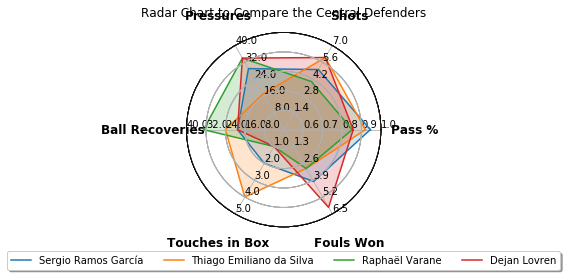

In [55]:
player_names = ['Sergio Ramos García', 'Thiago Emiliano da Silva', 'Raphaël Varane', 'Dejan Lovren']

ranges = [(0.5, 1.0), (0, 7), (0, 40),
         (0, 40), (0, 5), (0, 6.5)]     

variables = ['Pass %', 'Shots', 'Pressures', 'Ball Recoveries', 'Touches in Box', 'Fouls Won']

       
# plotting
fig1 = plt.figure(figsize=(3, 3))
radar2 = ComplexRadar(fig1, variables, ranges)

for player_name in player_names:
    data = list(get_player_stats(player_name).values())
    radar2.plot(data, label=player_name)
    radar2.fill(data, alpha=0.2)
    
radar2.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
      fancybox=True, shadow=True, ncol=4, fontsize=10)
plt.title('Radar Chart to Compare the Central Defenders')
# plt.show()
plt.savefig('defradar.png')

In [34]:
list(get_player_stats('Dejan Lovren').values())

[0.8575268817204301, 6, 34, 19, 1, 6]

In [39]:
def get_mid_stats(player_name):
    
    # count total number of dribble
    total_dribble = df.groupby('player_name')['type_name'].apply(lambda x:(x=='Dribble').sum()).reset_index(name='total_dribble')
    # number of dribble completed
    dribble_complete= df.groupby('player_name')['dribble_outcome_name'].apply(lambda x: (x=='Complete').sum()).reset_index(name='dribble_completed')
    # total number of pass
    total_pass = df.groupby('player_name')['type_name'].apply(lambda x: (x=='Pass').sum()).reset_index(name='total_pass')
    # number of incomplete pass
    pass_incomplete = df.groupby('player_name')['pass_outcome_name'].count().reset_index(name='incomplete_pass')
    # number of times being dispossessed
    dispossessed = df.groupby('player_name')['type_name'].apply(lambda x: (x=='Dispossessed').sum()).reset_index(name='dispossessed')
    
    df_list = [total_dribble, dribble_complete, total_pass, pass_incomplete, dispossessed]
    summary_data = reduce(lambda x, y: pd.merge(x, y, on = 'player_name'), df_list)
    
    return df_list

In [ ]:
player_names = ['Sergio Ramos García', 'Thiago Emiliano da Silva', 'Raphaël Varane', 'Dejan Lovren']

ranges = [(0.5, 1.0), (0, 7), (0, 40),
         (0, 40), (0, 5), (0, 6.5)]     

variables = ['Total Dribbles', 'Dribbles Completed', 'Total Passes', 'Passes Incomplete', 'Dispossessed']

       
# plotting
fig1 = plt.figure(figsize=(6, 6))
radar2 = ComplexRadar(fig1, variables, ranges)

for player_name in player_names:
    data = list(get_mid_stats(player_name).values())
    radar2.plot(data, label=player_name)
    radar2.fill(data, alpha=0.2)
    
radar2.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
      fancybox=True, shadow=True, ncol=4, fontsize=13)
plt.title('Radar Chart to Compare the Central Defenders')
plt.show()

In [41]:
get_mid_stats('Luka Modrić')

[                             player_name  total_dribble
 0                             Aaron Mooy              1
 1         Abdalla Mahmoud El Said Bekhit              0
 2                  Abdiel Arroyo Molinar              1
 3             Abdullah Ibrahim Al Maiouf              0
 4                 Abdullah Ibrahim Otayf              4
 5                        Abdullahi Shehu              1
 6             Abel Enrique Aguilar Tapia              0
 7                     Achraf Hakimi Mouh              7
 8                            Adem Ljajić              8
 9                          Adnan Januzaj              6
 10                 Adolfo Abdiel Machado              0
 11      Adrien Sebastian Perruchet Silva              1
 12      Ahmed Fathy Abdel Meneim Ibrahim              1
 13                          Ahmed Hegazi              0
 14                          Ahmed Khalil              1
 15                            Ahmed Musa             10
 16                          Al